In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.0.1
2.4


In [3]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

In [4]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(6)

In [5]:
dike_model

In [6]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)
RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [7]:
#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1)
IntegerParameter('0_RfR 1', 0, 1)
IntegerParameter('0_RfR 2', 0, 1)
IntegerParameter('1_RfR 0', 0, 1)
IntegerParameter('1_RfR 1', 0, 1)
IntegerParameter('1_RfR 2', 0, 1)
IntegerParameter('2_RfR 0', 0, 1)
IntegerParameter('2_RfR 1', 0, 1)
IntegerParameter('2_RfR 2', 0, 1)
IntegerParameter('3_RfR 0', 0, 1)
IntegerParameter('3_RfR 1', 0, 1)
IntegerParameter('3_RfR 2', 0, 1)
IntegerParameter('4_RfR 0', 0, 1)
IntegerParameter('4_RfR 1', 0, 1)
IntegerParameter('4_RfR 2', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)
IntegerParameter('A.1_DikeIncrease 0', 0, 10)
IntegerParameter('A.1_DikeIncrease 1', 0, 10)
IntegerParameter('A.1_DikeIncrease 2', 0, 10)
IntegerParameter('A.2_DikeIncrease 0', 0, 10)
IntegerParameter('A.2_DikeIncrease 1', 0, 10)
IntegerParameter('A.2_DikeIncrease 2', 0, 10)
IntegerParameter('A.3_DikeIncrease 0', 0, 10)
IntegerParameter('A.3_DikeIncrease 1', 0, 10)
IntegerParameter('A.3_DikeIncrease 2', 0, 10)
IntegerParameter('A.4_DikeIncreas

In [8]:
#enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('Ring1/2_Expected Annual Damage', variable_name=['A.1_Expected Annual Damage 0', 'A.2_Expected Annual Damage 0', 'A.1_Expected Annual Damage 1', 'A.2_Expected Annual Damage 1', 'A.1_Expected Annual Damage 2', 'A.2_Expected Annual Damage 2'], function=<function sum_over at 0x000002AD1B21CEE8>)
ScalarOutcome('Ring1/2_Expected Number of Deaths', variable_name=['A.1_Expected Number of Deaths 0', 'A.2_Expected Number of Deaths 0', 'A.1_Expected Number of Deaths 1', 'A.2_Expected Number of Deaths 1', 'A.1_Expected Number of Deaths 2', 'A.2_Expected Number of Deaths 2'], function=<function sum_over at 0x000002AD1B21CEE8>)
ScalarOutcome('Ring3_Expected Annual Damage', variable_name=['A.3_Expected Annual Damage 0', 'A.3_Expected Annual Damage 1', 'A.3_Expected Annual Damage 2'], function=<function sum_over at 0x000002AD1B21CEE8>)
ScalarOutcome('Ring3_Expected Number of Deaths', variable_name=['A.3_Expected Number of Deaths 0', 'A.3_Expected Number of Deaths 1', 'A.3_Expected Numbe

In [41]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    results_random = evaluator.perform_experiments(scenarios=100, policies=20)
    
experiments, outcomes = results_random
print(outcomes.keys())

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 20 policies * 1 model(s) = 2000 experiments
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 1400 cases completed
[MainProcess/INFO] 1600 cases completed
[MainProcess/INFO] 1800 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


dict_keys(['Ring1/2_Expected Annual Damage', 'Ring1/2_Expected Number of Deaths', 'Ring3_Expected Annual Damage', 'Ring3_Expected Number of Deaths', 'Gelderland Total Investment Costs', 'Expected Evacuation Costs', 'Total all costs'])


[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 2000 points remaining, containing 400 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.15, coverage: 0.75, density: 1.0 restricted_dimensions: 3


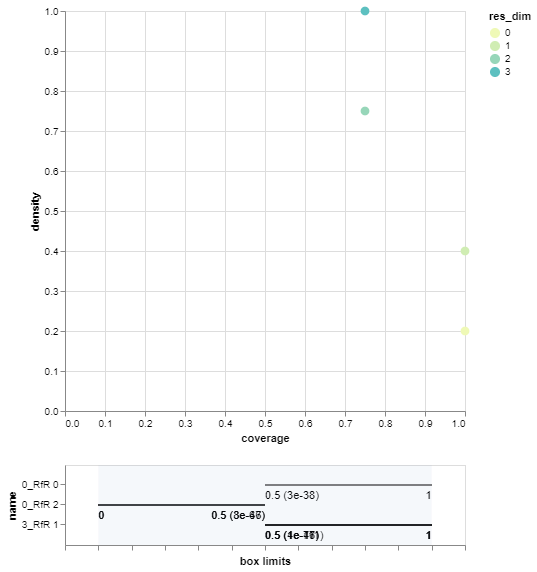

In [48]:
outcomes = pd.DataFrame(outcomes)
outcomes_interest = outcomes['Gelderland Total Investment Costs'] > np.percentile(outcomes['Gelderland Total Investment Costs'],80)
experiments_uncertain = experiments.iloc[:,:19]

from ema_workbench.analysis import prim

prim_alg = prim.Prim(experiments, outcomes_interest, threshold=0.8, peel_alpha=0.01)
box1 = prim_alg.find_box()

box1.inspect_tradeoff()

In [16]:
#defining specific policies
#policy 1 is about building all RFR projects
#policy 2 is about maximise all dike hightning
#policy 3 is random
from ema_workbench import Policy

policies = [Policy('full_rfr',       **{str(dike)+str('_RfR ')+str(n):1 for dike in range(5) for n in planning_steps}),
           Policy('full_dikeheight', **{str('A.')+str(dike)+str('_DikeIncrease ')+str(n):10 for dike in range(5) for n in planning_steps}),
           Policy('random',          **{})]

In [20]:
#pass the policies list to EMA workbench experiment runs
with MultiprocessingEvaluator(dike_model) as evaluator:
    results_policy = evaluator.perform_experiments(500, policies)
experiments, outcomes = results_policy

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 500 scenarios * 3 policies * 1 model(s) = 1500 experiments
[MainProcess/INFO] 150 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 450 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 750 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1050 cases completed
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 1350 cases completed
[MainProcess/INFO] 1500 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [39]:
outcomes = pd.DataFrame(outcomes)
outcomes_interest = outcomes['Gelderland Total Investment Costs'] > np.percentile(outcomes['Gelderland Total Investment Costs'],80)
experiments_uncertain = experiments.iloc[:,:19]

from ema_workbench.analysis import prim

prim_alg = prim.Prim(experiments_uncertain, outcomes_interest, threshold=0.28, peel_alpha=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] 1500 points remaining, containing 156 cases of interest
[MainProcess/INFO] mean: 0.2988505747126437, mass: 0.058, coverage: 0.16666666666666666, density: 0.2988505747126437 restricted_dimensions: 11


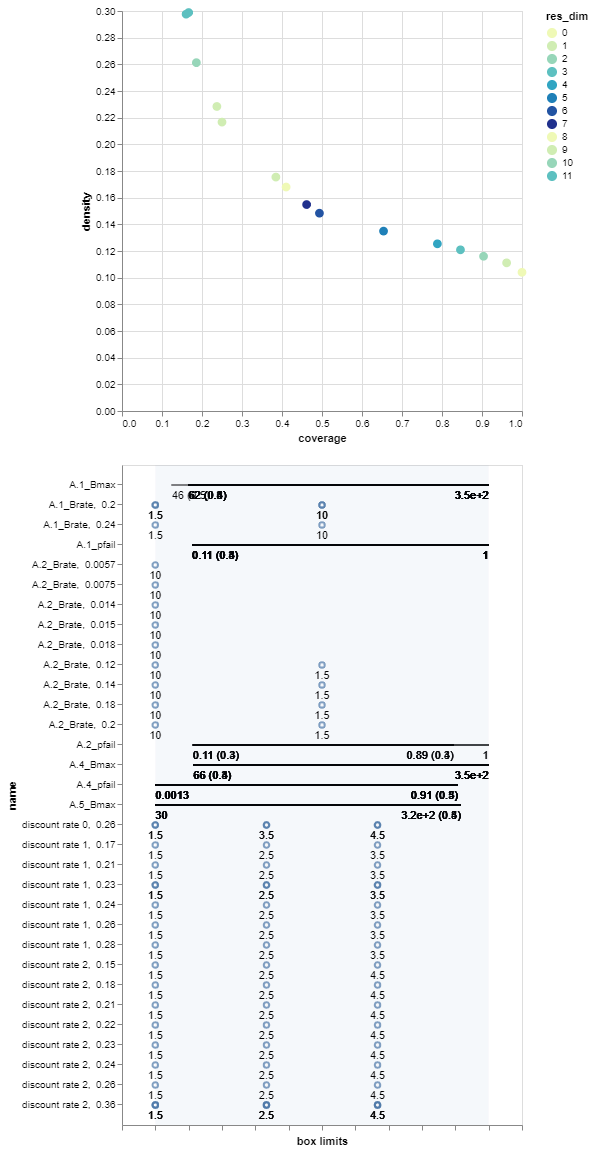

In [40]:
box1.inspect_tradeoff()